In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_selection import chi2, SelectKBest, f_classif, mutual_info_classif
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow.keras.backend as k
from tensorflow.keras import Model, Input, layers
import lime
from lime import lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout

In [27]:
df_dataClass = pd.read_csv('DataClass.csv')

In [28]:
df_dataClass.head()

NOII_type  NOAM_type  NOCS_type  NOM_type  NMO_type  ATFD_type  \
0          0          0          0         6         0          3   
1          0          0          0         2         2          0   
2          0          0          0         7         0          2   
3          0          0          0         1         0          0   
4          0          0          0         4         0          0   

   FANOUT_type  NOMNAMM_type  NOA_type  NIM_type  ...  \
0            1             6         2        32  ...   
1            0             2         4        30  ...   
2            1             7         3        32  ...   
3            0             1         2        32  ...   
4            2             4         1        32  ...   

   number_not_abstract_not_final_methods  number_static_methods  \
0                                      6                      0   
1                                      2                      0   
2                                      7                      0   
3                                      1                      0   
4                                      4                      0   

   number_final_static_methods  number_final_not_static_methods  \
0                            0                                0   
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   

   number_not_final_static_methods  number_not_final_not_static_methods  \
0                                0                                    6   
1                                0                                    2   
2                                0                                    7   
3                                0                                    1   
4                                0                                    4   

   number_standard_design_methods  \
0                               6   
1                               2   
2                               7   
3                               1   
4                               4   

   number_constructor_DefaultConstructor_methods  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   number_constructor_NotDefaultConstructor_methods  is_data_class  
0                                                 0          False  
1                                                 0          False  
2                                                 0          False  
3                                                 0          False  
4                                                 0          False  

[5 rows x 62 columns]

In [29]:
df_dataClass.shape

(420, 62)

In [30]:
df_dataClass.dtypes

NOII_type                                           int64
NOAM_type                                           int64
NOCS_type                                           int64
NOM_type                                            int64
NMO_type                                            int64
                                                    ...  
number_not_final_not_static_methods                 int64
number_standard_design_methods                      int64
number_constructor_DefaultConstructor_methods       int64
number_constructor_NotDefaultConstructor_methods    int64
is_data_class                                        bool
Length: 62, dtype: object

In [31]:
df_dataClass['numeric_label'], unique_lables = pd.factorize(df_dataClass['is_data_class'])
df_dataClass.head()

NOII_type  NOAM_type  NOCS_type  NOM_type  NMO_type  ATFD_type  \
0          0          0          0         6         0          3   
1          0          0          0         2         2          0   
2          0          0          0         7         0          2   
3          0          0          0         1         0          0   
4          0          0          0         4         0          0   

   FANOUT_type  NOMNAMM_type  NOA_type  NIM_type  ...  number_static_methods  \
0            1             6         2        32  ...                      0   
1            0             2         4        30  ...                      0   
2            1             7         3        32  ...                      0   
3            0             1         2        32  ...                      0   
4            2             4         1        32  ...                      0   

   number_final_static_methods  number_final_not_static_methods  \
0                            0                                0   
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   

   number_not_final_static_methods  number_not_final_not_static_methods  \
0                                0                                    6   
1                                0                                    2   
2                                0                                    7   
3                                0                                    1   
4                                0                                    4   

   number_standard_design_methods  \
0                               6   
1                               2   
2                               7   
3                               1   
4                               4   

   number_constructor_DefaultConstructor_methods  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   number_constructor_NotDefaultConstructor_methods  is_data_class  \
0                                                 0          False   
1                                                 0          False   
2                                                 0          False   
3                                                 0          False   
4                                                 0          False   

   numeric_label  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 63 columns]

In [32]:
df_dataClass = df_dataClass.drop(columns=['is_data_class'])

In [33]:
df_dataClass.head()

NOII_type  NOAM_type  NOCS_type  NOM_type  NMO_type  ATFD_type  \
0          0          0          0         6         0          3   
1          0          0          0         2         2          0   
2          0          0          0         7         0          2   
3          0          0          0         1         0          0   
4          0          0          0         4         0          0   

   FANOUT_type  NOMNAMM_type  NOA_type  NIM_type  ...  \
0            1             6         2        32  ...   
1            0             2         4        30  ...   
2            1             7         3        32  ...   
3            0             1         2        32  ...   
4            2             4         1        32  ...   

   number_not_abstract_not_final_methods  number_static_methods  \
0                                      6                      0   
1                                      2                      0   
2                                      7                      0   
3                                      1                      0   
4                                      4                      0   

   number_final_static_methods  number_final_not_static_methods  \
0                            0                                0   
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   

   number_not_final_static_methods  number_not_final_not_static_methods  \
0                                0                                    6   
1                                0                                    2   
2                                0                                    7   
3                                0                                    1   
4                                0                                    4   

   number_standard_design_methods  \
0                               6   
1                               2   
2                               7   
3                               1   
4                               4   

   number_constructor_DefaultConstructor_methods  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   number_constructor_NotDefaultConstructor_methods  numeric_label  
0                                                 0              0  
1                                                 0              0  
2                                                 0              0  
3                                                 0              0  
4                                                 0              0  

[5 rows x 62 columns]

In [34]:
negative_values = df_dataClass[df_dataClass < 0].any().any()
if negative_values:
    print("Dataset contains negative values!")
else:
    print("No negative values found.")

Dataset contains negative values!


In [35]:
df_dataClass_cleaned = df_dataClass[(df_dataClass >= 0).all(axis=1)]

In [36]:
df_dataClass_cleaned.shape

(392, 62)

In [37]:
x = df_dataClass_cleaned.drop(columns=['numeric_label'])
y = df_dataClass_cleaned['numeric_label']

Model Accuracy Without Feature Selection

train test split

In [38]:
selected_independent_df = x
selected_independent_df

NOII_type  NOAM_type  NOCS_type  NOM_type  NMO_type  ATFD_type  \
0            0          0          0         6         0          3   
1            0          0          0         2         2          0   
2            0          0          0         7         0          2   
3            0          0          0         1         0          0   
4            0          0          0         4         0          0   
..         ...        ...        ...       ...       ...        ...   
415          0          0          0         1         0          0   
416          1          1          0       395         0         44   
417          0          0          0         1         0          0   
418          0          0          0         4         0          0   
419          0          8          0        34         0         86   

     FANOUT_type  NOMNAMM_type  NOA_type  NIM_type  ...  \
0              1             6         2        32  ...   
1              0             2         4        30  ...   
2              1             7         3        32  ...   
3              0             1         2        32  ...   
4              2             4         1        32  ...   
..           ...           ...       ...       ...  ...   
415            0             1         3         0  ...   
416           77           394       142         0  ...   
417            0             1         0        15  ...   
418            0             4         0        15  ...   
419           50            26        11         0  ...   

     number_abstract_methods  number_not_abstract_not_final_methods  \
0                          0                                      6   
1                          0                                      2   
2                          0                                      7   
3                          0                                      1   
4                          0                                      4   
..                       ...                                    ...   
415                        0                                      1   
416                        0                                    394   
417                        0                                      1   
418                        0                                      4   
419                        0                                     34   

     number_static_methods  number_final_static_methods  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   
..                     ...                          ...   
415                      0                            0   
416                    387                            1   
417                      0                            0   
418                      0                            0   
419                      0                            0   

     number_final_not_static_methods  number_not_final_static_methods  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   
..                               ...                              ...   
415                                0                                0   
416                                0                              386   
417                                0                                0   
418                                0                                0   
419                                0                                0   

    

In [39]:
independent_array = selected_independent_df.to_numpy()
independent_array

array([[ 0.,  0.,  0., ...,  6.,  0.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  0.,  0., ...,  7.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  4.],
       [ 0.,  8.,  0., ..., 23.,  0.,  3.]])

In [40]:
selected_dependent_df = y
selected_dependent_df

0      0
1      0
2      0
3      0
4      0
      ..
415    0
416    0
417    0
418    0
419    0
Name: numeric_label, Length: 392, dtype: int64

In [41]:
dependent_array = selected_dependent_df.to_numpy()
dependent_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,

In [42]:
x_train, x_test, y_train, y_test = train_test_split(independent_array, dependent_array, test_size=0.2, stratify=y, random_state=42)

K Fold Cross Validation

In [43]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

ADDING ATTENTION LAYER TO THE MODEL

In [44]:
def attention_block(inputs):
    input_shape = k.int_shape(inputs)
    attention_probs = layers.Dense(input_shape[-1], activation='softmax')(inputs)
    attention_mul = layers.multiply([inputs, attention_probs])
    return attention_mul

In [45]:
fold_no = 1
train_acc_per_fold = []
val_acc_per_fold = []
test_acc_per_fold = []

In [46]:
for train, val in cv.split(x_train, y_train):

    print('     ')
    print(f'Training for fold {fold_no}: ')

    input_layer = Input(shape=(df_dataClass_cleaned.shape[1] - 1, 1))
    conv1 = Conv1D(128, kernel_size=1, activation='relu')(input_layer)
    # dropout1 = Dropout(0.2)(conv1)
    # conv2 = Conv1D(64, kernel_size=1, activation='tanh')(dropout1)
    conv2 = Conv1D(64, kernel_size=1, activation='tanh')(conv1)
    # dropout2 = Dropout(0.3)(conv2)
    # attention_output = attention_block(dropout2)
    attention_output = attention_block(conv2)
    flatten = Flatten()(attention_output)
    dense1 = Dense(64, activation='relu')(flatten)
    dropout3 = Dropout(0.4)(dense1)
    output = Dense(1, activation='sigmoid')(dropout3)
    # output = Dense(1, activation='sigmoid')(dense1)
    model = Model(inputs=input_layer, outputs=output)

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(x_train[train], y_train[train], epochs=32, batch_size=2, validation_data=(x_train[val], y_train[val]))

    scores_train = model.evaluate(x_train[train], y_train[train])
    train_acc_per_fold.append(scores_train[1] * 100)

    scores_val = model.evaluate(x_train[val], y_train[val])
    val_acc_per_fold.append(scores_val[1] * 100)

    scores_test = model.evaluate(x_test, y_test)
    test_acc_per_fold.append(scores_test[1] * 100)

    fold_no = fold_no + 1



     
Training for fold 1: 
Epoch 1/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6903 - loss: 0.5750 - val_accuracy: 0.9688 - val_loss: 0.2789
Epoch 2/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9205 - loss: 0.2601 - val_accuracy: 0.9688 - val_loss: 0.1335
Epoch 3/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9484 - loss: 0.1443 - val_accuracy: 0.9688 - val_loss: 0.1104
Epoch 4/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9732 - loss: 0.0977 - val_accuracy: 0.9688 - val_loss: 0.0762
Epoch 5/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9653 - loss: 0.0775 - val_accuracy: 0.9688 - val_loss: 0.0805
Epoch 6/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9811 - loss: 0.0595 - val_accuracy: 0.9688 - val_loss: 0.0645
Epoch 7/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9874 - loss: 0.0430 - val_accuracy: 1.0000 - val_loss: 0.0537
Epoch 8/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9918 - lo

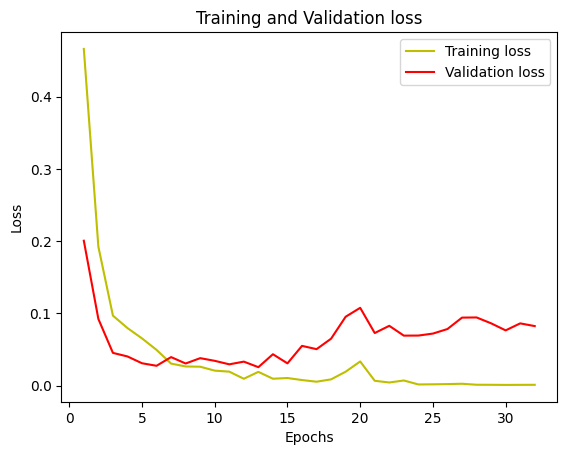

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

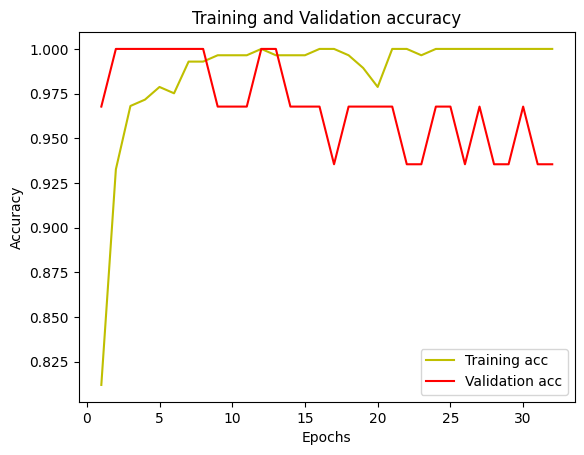

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
serial = 1
for acc in train_acc_per_fold:
    print(f"{serial}. Training Accuracy with attention layer wihtout FS: ", acc)
    serial = serial + 1

1. Training Accuracy with attention layer wihtout FS:  100.0
2. Training Accuracy with attention layer wihtout FS:  100.0
3. Training Accuracy with attention layer wihtout FS:  100.0
4. Training Accuracy with attention layer wihtout FS:  100.0
5. Training Accuracy with attention layer wihtout FS:  100.0
6. Training Accuracy with attention layer wihtout FS:  100.0
7. Training Accuracy with attention layer wihtout FS:  100.0
8. Training Accuracy with attention layer wihtout FS:  100.0
9. Training Accuracy with attention layer wihtout FS:  100.0
10. Training Accuracy with attention layer wihtout FS:  100.0


In [50]:
serial = 1
for acc in val_acc_per_fold:
    print(f"{serial}. Validation Accuracy with attention layer without FS: ", acc)
    serial = serial + 1

1. Validation Accuracy with attention layer without FS:  100.0
2. Validation Accuracy with attention layer without FS:  100.0
3. Validation Accuracy with attention layer without FS:  100.0
4. Validation Accuracy with attention layer without FS:  93.54838728904724
5. Validation Accuracy with attention layer without FS:  100.0
6. Validation Accuracy with attention layer without FS:  100.0
7. Validation Accuracy with attention layer without FS:  100.0
8. Validation Accuracy with attention layer without FS:  93.54838728904724
9. Validation Accuracy with attention layer without FS:  96.77419066429138
10. Validation Accuracy with attention layer without FS:  93.54838728904724


In [51]:
serial = 1
for acc in test_acc_per_fold:
    print(f"{serial}. Test Accuracy with attention layer without FS: ", acc)
    serial = serial + 1

1. Test Accuracy with attention layer without FS:  100.0
2. Test Accuracy with attention layer without FS:  100.0
3. Test Accuracy with attention layer without FS:  98.73417615890503
4. Test Accuracy with attention layer without FS:  100.0
5. Test Accuracy with attention layer without FS:  100.0
6. Test Accuracy with attention layer without FS:  100.0
7. Test Accuracy with attention layer without FS:  100.0
8. Test Accuracy with attention layer without FS:  100.0
9. Test Accuracy with attention layer without FS:  100.0
10. Test Accuracy with attention layer without FS:  100.0


In [52]:
print("Training accuracy with attention layer without FS: ", np.mean(train_acc_per_fold))

Training accuracy with attention layer without FS:  100.0


In [53]:
print("Validation accuracy with attention layer without FS: ", np.mean(val_acc_per_fold))

Validation accuracy with attention layer without FS:  97.74193525314331


In [54]:
print("Testing accuracy with attention layer without FS: ", np.mean(test_acc_per_fold))

Testing accuracy with attention layer without FS:  99.8734176158905


drawing the confusion matrix

In [55]:
y_pred = model.predict(x_test)
y_pred_class = (y_pred > 0.5).astype("int32")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


<Axes: >

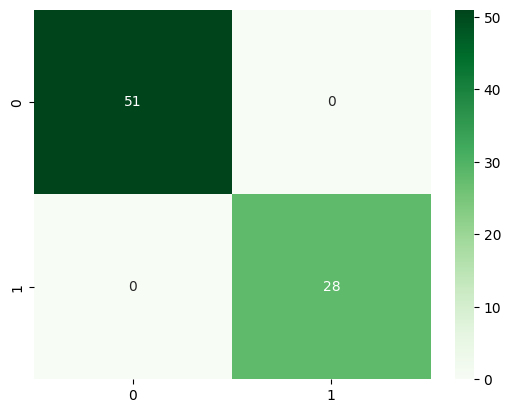

In [56]:
cm = confusion_matrix(y_test, y_pred_class, labels=[0,1])
sns.heatmap(cm, cmap='Greens', annot=True)


Evaluation Matrices

In [57]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        28

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



chi square technique

In [58]:
chi_score = chi2(x,y)

<Axes: >

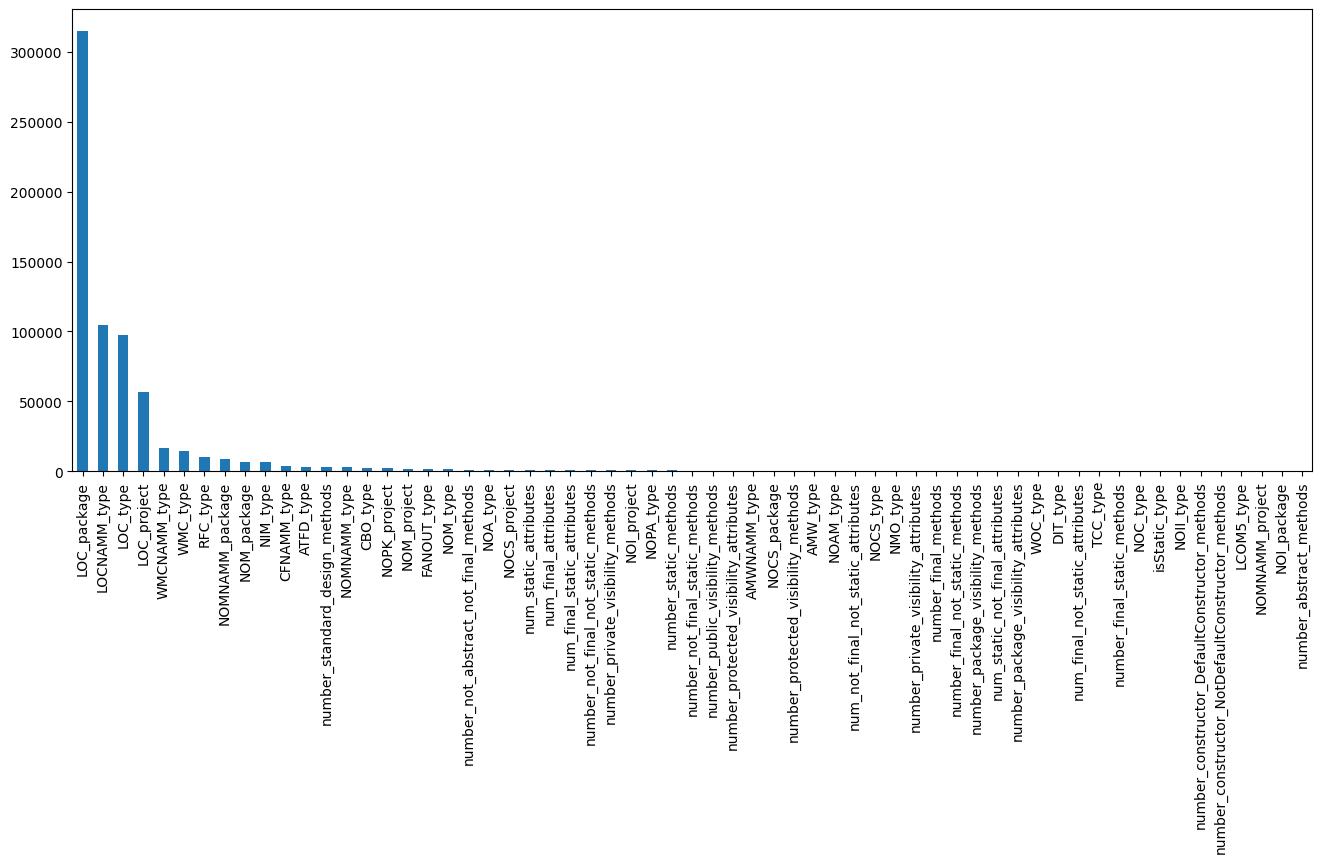

In [59]:
chi_values = pd.Series(chi_score[0], index=x.columns)
chi_values.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(16, 6)) 
chi_values.plot.bar()

In [60]:
chi_selector = SelectKBest(chi2, k=25)
x_chi_selected = chi_selector.fit_transform(x,y)
chi_support = chi_selector.get_support()
chi_features_dataClass = x.columns[chi_support]

In [61]:
print("selected features using chi2: ", chi_features_dataClass)

selected features using chi2:  Index(['NOM_type', 'ATFD_type', 'FANOUT_type', 'NOMNAMM_type', 'NOA_type',
       'NIM_type', 'LOC_type', 'LOCNAMM_type', 'CFNAMM_type', 'CBO_type',
       'RFC_type', 'WMC_type', 'WMCNAMM_type', 'NOMNAMM_package',
       'LOC_package', 'NOM_package', 'NOPK_project', 'NOCS_project',
       'NOM_project', 'LOC_project', 'num_final_attributes',
       'num_static_attributes', 'num_final_static_attributes',
       'number_not_abstract_not_final_methods',
       'number_standard_design_methods'],
      dtype='object')


correlation technique

In [62]:
cor_dataClass = df_dataClass_cleaned.corr()
cor_dataClass

NOII_type  NOAM_type  \
NOII_type                                          1.000000   0.259924   
NOAM_type                                          0.259924   1.000000   
NOCS_type                                          0.161185   0.099303   
NOM_type                                           0.341513   0.516782   
NMO_type                                          -0.001517   0.139116   
...                                                     ...        ...   
number_not_final_not_static_methods                0.378673   0.688367   
number_standard_design_methods                     0.300634   0.271571   
number_constructor_DefaultConstructor_methods     -0.067432   0.081952   
number_constructor_NotDefaultConstructor_methods   0.177646   0.174696   
numeric_label                                     -0.137014   0.235687   

                                                  NOCS_type  NOM_type  \
NOII_type                                          0.161185  0.341513   
NOAM_type                                          0.099303  0.516782   
NOCS_type                                          1.000000  0.249667   
NOM_type                                           0.249667  1.000000   
NMO_type                                           0.009524  0.234445   
...                                                     ...       ...   
number_not_final_not_static_methods                0.307162  0.784684   
number_standard_design_methods                     0.251292  0.963594   
number_constructor_DefaultConstructor_methods     -0.069030 -0.095356   
number_constructor_NotDefaultConstructor_methods   0.046010  0.331831   
numeric_label                                     -0.210564 -0.240475   

                                                  NMO_type  ATFD_type  \
NOII_type                                        -0.001517   0.146187   
NOAM_type                                         0.139116   0.140546   
NOCS_type                                         0.009524   0.199296   
NOM_type                                          0.234445   0.451888   
NMO_type                                          1.000000   0.255704   
...                                                    ...        ...   
number_not_final_not_static_methods               0.316211   0.527236   
number_standard_design_methods                    0.217340   0.460803   
number_constructor_DefaultConstructor_methods    -0.032401  -0.128491   
number_constructor_NotDefaultConstructor_methods  0.150193   0.229810   
numeric_label                                    -0.172318  -0.322434   

                                                  FANOUT_type  NOMNAMM_type  \
NOII_type                                            0.299342      0.304237   
NOAM_type                                            0.220337      0.275413   
NOCS_type                                            0.518313      0.250074   
NOM_type                                             0.696967      0.965336   
NMO_type                                             0.228138      0.220842   
...                                                       ...           ...   
number_not_final_not_static_methods                  0.648098      0.671247   
number_standard_design_methods                       0.713836      0.999215   
number_constructor_DefaultConstructor_methods       -0.174685     -0.132060   
number_constructor_NotDefaultConstructor_methods     0.253496      0.319349   
numeric_label                                       -0.413769     -0.341883   

                                                  NOA_type  NIM_type  ...  \
NOII_type                                         0.323132  0.117497  ...   
NOAM_type                                         0.287488  0.036869  ...   
NOCS_type                                         0.313299  0.349355  ...   
NOM_type                                          0.599350  0.136237  ...   
NMO_type                                          0.109906  0.299054  ...

In [63]:
target = abs(cor_dataClass['numeric_label'])
target = target.sort_values(ascending=False)
target

numeric_label              1.000000
WOC_type                   0.652235
TCC_type                   0.484264
FANOUT_type                0.413769
LOCNAMM_type               0.400707
                             ...   
LOC_project                0.042758
NOM_project                0.033922
NOI_package                0.007202
NOMNAMM_project            0.001515
number_abstract_methods         NaN
Name: numeric_label, Length: 62, dtype: float64

In [64]:
corr_features_dataClass = target[target > 0.23]
corr_features_dataClass

numeric_label                        1.000000
WOC_type                             0.652235
TCC_type                             0.484264
FANOUT_type                          0.413769
LOCNAMM_type                         0.400707
WMCNAMM_type                         0.396546
CFNAMM_type                          0.391428
LOC_type                             0.388995
WMC_type                             0.378597
DIT_type                             0.354720
NOMNAMM_type                         0.341883
number_standard_design_methods       0.341469
AMW_type                             0.328233
RFC_type                             0.326120
ATFD_type                            0.322434
AMWNAMM_type                         0.313801
LCOM5_type                           0.303370
number_private_visibility_methods    0.281232
NOA_type                             0.267824
NOPK_project                         0.249649
num_static_attributes                0.242286
NOM_type                          

In [65]:
len(corr_features_dataClass)

25

In [66]:
corr_feature_list_dataClass = corr_features_dataClass.index.tolist()
corr_feature_list_dataClass.pop(0)
corr_feature_list_dataClass

['WOC_type',
 'TCC_type',
 'FANOUT_type',
 'LOCNAMM_type',
 'WMCNAMM_type',
 'CFNAMM_type',
 'LOC_type',
 'WMC_type',
 'DIT_type',
 'NOMNAMM_type',
 'number_standard_design_methods',
 'AMW_type',
 'RFC_type',
 'ATFD_type',
 'AMWNAMM_type',
 'LCOM5_type',
 'number_private_visibility_methods',
 'NOA_type',
 'NOPK_project',
 'num_static_attributes',
 'NOM_type',
 'num_final_attributes',
 'NOAM_type',
 'isStatic_type']

In [67]:
len(corr_feature_list_dataClass)

24

anova f-test

In [68]:
fvalue_selector = SelectKBest(f_classif, k=25)
x_kbest = fvalue_selector.fit_transform(x,y)
x_kbest

e:\Python Dev Works\py_dev_v3.12\venv_py3.12\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [51] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
e:\Python Dev Works\py_dev_v3.12\venv_py3.12\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


array([[ 0.,  6.,  3., ...,  0.,  4.,  6.],
       [ 0.,  2.,  0., ...,  0.,  0.,  2.],
       [ 0.,  7.,  2., ...,  0.,  3.,  7.],
       ...,
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  4.,  0., ...,  0.,  0.,  0.],
       [ 8., 34., 86., ...,  0.,  5., 23.]])

In [69]:
selected_features_anova_mask = fvalue_selector.get_support()
selected_features_anova_dataClass = x.columns[selected_features_anova_mask]
selected_features_anova_dataClass

Index(['NOAM_type', 'NOM_type', 'ATFD_type', 'FANOUT_type', 'NOMNAMM_type',
       'NOA_type', 'DIT_type', 'LOC_type', 'LOCNAMM_type', 'CFNAMM_type',
       'TCC_type', 'RFC_type', 'WMC_type', 'LCOM5_type', 'WOC_type',
       'WMCNAMM_type', 'AMW_type', 'AMWNAMM_type', 'NOPK_project',
       'isStatic_type', 'num_final_attributes', 'num_static_attributes',
       'num_final_static_attributes', 'number_private_visibility_methods',
       'number_standard_design_methods'],
      dtype='object')

mutual information gain

In [70]:
mutual_info = mutual_info_classif(x,y)
mutual_info

array([0.04737391, 0.31389645, 0.05648059, 0.22524498, 0.06322565,
       0.19840142, 0.27485869, 0.25191433, 0.169336  , 0.12533432,
       0.06944716, 0.182371  , 0.20794879, 0.24624786, 0.262148  ,
       0.24131638, 0.29240557, 0.05577286, 0.30423205, 0.15609975,
       0.27411746, 0.2377144 , 0.2295729 , 0.23959406, 0.07545419,
       0.11137745, 0.02285383, 0.13641456, 0.08295313, 0.11743313,
       0.12644192, 0.14361785, 0.11156508, 0.12678157, 0.12156343,
       0.0148123 , 0.0643754 , 0.18278336, 0.04670328, 0.        ,
       0.08780414, 0.08145968, 0.05633426, 0.18222742, 0.02700453,
       0.01383148, 0.13081389, 0.2077648 , 0.12176095, 0.03923872,
       0.02708418, 0.02313403, 0.22462522, 0.09822995, 0.00471904,
       0.03951753, 0.07463715, 0.24870692, 0.24276106, 0.01221681,
       0.        ])

In [71]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
mutual_info.sort_values(ascending=False).head(20)

NOAM_type                                0.313896
WMC_type                                 0.304232
RFC_type                                 0.292406
FANOUT_type                              0.274859
WOC_type                                 0.274117
TCC_type                                 0.262148
NOMNAMM_type                             0.251914
number_not_final_not_static_methods      0.248707
CFNAMM_type                              0.246248
number_standard_design_methods           0.242761
CBO_type                                 0.241316
AMWNAMM_type                             0.239594
WMCNAMM_type                             0.237714
AMW_type                                 0.229573
NOM_type                                 0.225245
number_not_abstract_not_final_methods    0.224625
LOCNAMM_type                             0.207949
number_private_visibility_methods        0.207765
ATFD_type                                0.198401
number_private_visibility_attributes     0.182783


In [72]:
select_mutual = SelectKBest(mutual_info_classif, k=25)
select_mutual.fit(x,y)
select_mutual_dataClass = x.columns[select_mutual.get_support()]
select_mutual_dataClass

Index(['NOAM_type', 'NOM_type', 'ATFD_type', 'FANOUT_type', 'NOMNAMM_type',
       'NOA_type', 'NIM_type', 'LOC_type', 'LOCNAMM_type', 'CFNAMM_type',
       'TCC_type', 'CBO_type', 'RFC_type', 'WMC_type', 'LCOM5_type',
       'WOC_type', 'WMCNAMM_type', 'AMW_type', 'AMWNAMM_type',
       'number_private_visibility_attributes',
       'num_not_final_not_static_attributes',
       'number_private_visibility_methods',
       'number_not_abstract_not_final_methods',
       'number_not_final_not_static_methods',
       'number_standard_design_methods'],
      dtype='object')

union approach

In [73]:
common_features = list(set(chi_features_dataClass) & set(selected_features_anova_dataClass) & set(select_mutual_dataClass) & set(corr_feature_list_dataClass) )
print("Common features (Intersection of Chi-square and RFE):", common_features)

Common features (Intersection of Chi-square and RFE): ['WMC_type', 'NOA_type', 'CFNAMM_type', 'NOM_type', 'LOC_type', 'number_standard_design_methods', 'LOCNAMM_type', 'ATFD_type', 'NOMNAMM_type', 'RFC_type', 'FANOUT_type', 'WMCNAMM_type']


In [74]:
len(common_features)

12

voting approach

In [75]:
all_features_dataClass = list(chi_features_dataClass) + list(selected_features_anova_dataClass) + list(select_mutual_dataClass) + list(corr_feature_list_dataClass)
voted_features_dataClass = Counter(all_features_dataClass)
voted_features_dataClass

Counter({'NOM_type': 4,
         'ATFD_type': 4,
         'FANOUT_type': 4,
         'NOMNAMM_type': 4,
         'NOA_type': 4,
         'LOC_type': 4,
         'LOCNAMM_type': 4,
         'CFNAMM_type': 4,
         'RFC_type': 4,
         'WMC_type': 4,
         'WMCNAMM_type': 4,
         'number_standard_design_methods': 4,
         'NOPK_project': 3,
         'num_final_attributes': 3,
         'num_static_attributes': 3,
         'NOAM_type': 3,
         'TCC_type': 3,
         'LCOM5_type': 3,
         'WOC_type': 3,
         'AMW_type': 3,
         'AMWNAMM_type': 3,
         'number_private_visibility_methods': 3,
         'NIM_type': 2,
         'CBO_type': 2,
         'num_final_static_attributes': 2,
         'number_not_abstract_not_final_methods': 2,
         'DIT_type': 2,
         'isStatic_type': 2,
         'NOMNAMM_package': 1,
         'LOC_package': 1,
         'NOM_package': 1,
         'NOCS_project': 1,
         'NOM_project': 1,
         'LOC_project': 1,
      

In [76]:
best_features_dataClass = [feature for feature, count in voted_features_dataClass.items() if count >= 3]
print("Best features through voting:", best_features_dataClass)

Best features through voting: ['NOM_type', 'ATFD_type', 'FANOUT_type', 'NOMNAMM_type', 'NOA_type', 'LOC_type', 'LOCNAMM_type', 'CFNAMM_type', 'RFC_type', 'WMC_type', 'WMCNAMM_type', 'NOPK_project', 'num_final_attributes', 'num_static_attributes', 'number_standard_design_methods', 'NOAM_type', 'TCC_type', 'LCOM5_type', 'WOC_type', 'AMW_type', 'AMWNAMM_type', 'number_private_visibility_methods']


In [77]:
len(best_features_dataClass)

22

train test split

In [78]:
selected_independent_df = df_dataClass_cleaned[best_features_dataClass]
selected_independent_df

NOM_type  ATFD_type  FANOUT_type  NOMNAMM_type  NOA_type  LOC_type  \
0           6          3            1             6         2        54   
1           2          0            0             2         4        18   
2           7          2            1             7         3        34   
3           1          0            0             1         2         4   
4           4          0            2             4         1        35   
..        ...        ...          ...           ...       ...       ...   
415         1          0            0             1         3         8   
416       395         44           77           394       142      4130   
417         1          0            0             1         0         7   
418         4          0            0             4         0        18   
419        34         86           50            26        11      1042   

     LOCNAMM_type  CFNAMM_type  RFC_type  WMC_type  ...  num_final_attributes  \
0              54            2        56         9  ...                     0   
1              18            0        48         4  ...                     0   
2              34            2        57         7  ...                     0   
3               4            0        49         1  ...                     0   
4              35            3        53         8  ...                     0   
..            ...          ...       ...       ...  ...                   ...   
415             8            0         1         1  ...                     0   
416          4124          156       584       938  ...                   138   
417             7            0         1         1  ...                     0   
418            18            0         4         4  ...                     0   
419           972           57       169       124  ...                     0   

     num_static_attributes  number_standard_design_methods  NOAM_type  \
0                        0                               6          0   
1                        1                               2          0   
2                        0                               7          0   
3                        0                               1          0   
4                        0                               4          0   
..                     ...                             ...        ...   
415                      0                               0          0   
416                    138                             392          1   
417                      0                               0          0   
418                      0                               0          0   
419                      0                              23          8   

     TCC_type  LCOM5_type  WOC_type  AMW_type  AMWNAMM_type  \
0    1.000000    1.000000  0.500000  1.500000      1.500000   
1    1.000000    0.500000  0.333333  2.000000      2.000000   
2    1.000000    1.000000  0.571429  1.000000      1.000000   
3    1.000000    0.000000  0.333333  1.000000      1.000000   
4    1.000000    1.000000  0.500000  2.000000      2.000000   
..        ...         ...       ...       ...           ...   
415  1.000000    0.000000  0.250000  1.000000      1.000000   
416  0.000169    1.000000  0.755299  2.374684      2.378173   
417  1.000000    0.000000  1.000000  1.000000      1.000000   
418  1.000000    0.000000  1.000000  1.000000      1.000000   
419  0.480000    0.903581  0.750000  3.647059      4.461538   

     number_private_visibility_methods  
0                                    4  
1                                    0  
2                                    3  
3                                    0  
4                                    3  
..                                 ...  
415                                  0  
416                                  0  
417                                  0  
418                                  0  
419                                  5  

[392

In [79]:
independent_array = selected_independent_df.to_numpy()
independent_array

array([[ 6.      ,  3.      ,  1.      , ...,  1.5     ,  1.5     ,
         4.      ],
       [ 2.      ,  0.      ,  0.      , ...,  2.      ,  2.      ,
         0.      ],
       [ 7.      ,  2.      ,  1.      , ...,  1.      ,  1.      ,
         3.      ],
       ...,
       [ 1.      ,  0.      ,  0.      , ...,  1.      ,  1.      ,
         0.      ],
       [ 4.      ,  0.      ,  0.      , ...,  1.      ,  1.      ,
         0.      ],
       [34.      , 86.      , 50.      , ...,  3.647059,  4.461538,
         5.      ]])

In [80]:
selected_dependent_df = df_dataClass_cleaned['numeric_label']
selected_dependent_df

0      0
1      0
2      0
3      0
4      0
      ..
415    0
416    0
417    0
418    0
419    0
Name: numeric_label, Length: 392, dtype: int64

In [81]:
dependent_array = selected_dependent_df.to_numpy()
dependent_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,

In [82]:
x_train, x_test, y_train, y_test = train_test_split(independent_array, dependent_array, test_size=0.2, stratify=y, random_state=42)

K Fold Cross Validation

In [83]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

Deep Learning Model

In [84]:
fold_no = 1
train_acc_per_fold = []
val_acc_per_fold = []
test_acc_per_fold = []

In [85]:
for train, val in cv.split(x_train, y_train):

    print('     ')
    print(f'Training for fold {fold_no}: ')

    model = Sequential([
        Conv1D(128, kernel_size=1, activation='relu', input_shape = (len(best_features_dataClass),1)),

        # Dropout(0.2),

        Conv1D(64, kernel_size=1, activation='tanh'),

        # Dropout(0.3),

        Flatten(),

        Dense(64, activation='relu'),

        Dropout(0.4),

        Dense(1, activation='sigmoid')    
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(x_train[train], y_train[train], epochs=32, batch_size=2, validation_data=(x_train[val], y_train[val]))

    scores_train = model.evaluate(x_train[train], y_train[train])
    train_acc_per_fold.append(scores_train[1] * 100)

    scores_val = model.evaluate(x_train[val], y_train[val])
    val_acc_per_fold.append(scores_val[1] * 100)

    scores_test = model.evaluate(x_test, y_test)
    test_acc_per_fold.append(scores_test[1] * 100)

    fold_no = fold_no + 1



     
Training for fold 1: 
Epoch 1/32


e:\Python Dev Works\py_dev_v3.12\venv_py3.12\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8286 - loss: 0.4091 - val_accuracy: 0.9375 - val_loss: 0.1411
Epoch 2/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9744 - loss: 0.0894 - val_accuracy: 0.9375 - val_loss: 0.2037
Epoch 3/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9587 - loss: 0.0886 - val_accuracy: 0.9688 - val_loss: 0.0801
Epoch 4/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9501 - loss: 0.2300 - val_accuracy: 0.9062 - val_loss: 0.1505
Epoch 5/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9745 - loss: 0.0789 - val_accuracy: 0.9375 - val_loss: 0.0962
Epoch 6/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9695 - loss: 0.0647 - val_accuracy: 0.9688 - val_loss: 0.0822
Epoch 7/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9769 - loss: 0.0658 - val_accuracy: 0.9688 - val_loss: 0.0639
Epoch 8/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9937 - loss: 0.0242 - val_accuracy: 0.9375 - val_

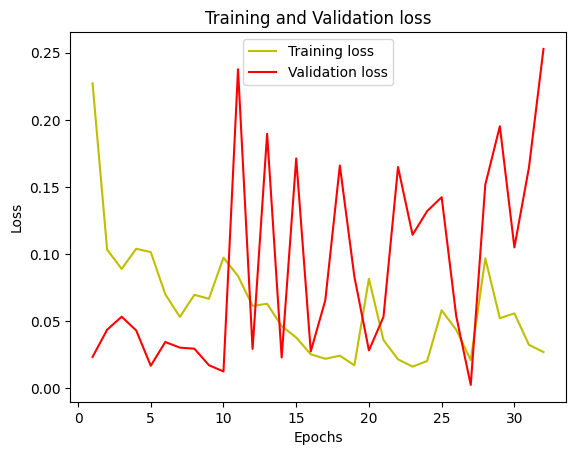

In [86]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

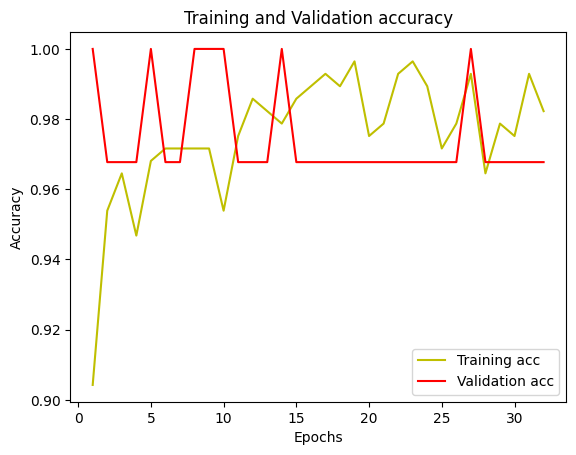

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [88]:
serial = 1
for acc in train_acc_per_fold:
    print(f"{serial}. Training Accuracy: ", acc)
    serial = serial + 1

1. Training Accuracy:  99.64413046836853
2. Training Accuracy:  99.64413046836853
3. Training Accuracy:  98.93238544464111
4. Training Accuracy:  100.0
5. Training Accuracy:  97.51772880554199
6. Training Accuracy:  100.0
7. Training Accuracy:  99.64538812637329
8. Training Accuracy:  100.0
9. Training Accuracy:  100.0
10. Training Accuracy:  98.93617033958435


In [89]:
serial = 1
for acc in val_acc_per_fold:
    print(f"{serial}. Validation Accuracy: ", acc)
    serial = serial + 1

1. Validation Accuracy:  96.875
2. Validation Accuracy:  100.0
3. Validation Accuracy:  100.0
4. Validation Accuracy:  96.77419066429138
5. Validation Accuracy:  96.77419066429138
6. Validation Accuracy:  100.0
7. Validation Accuracy:  100.0
8. Validation Accuracy:  100.0
9. Validation Accuracy:  100.0
10. Validation Accuracy:  96.77419066429138


In [90]:
serial = 1
for acc in test_acc_per_fold:
    print(f"{serial}. Test Accuracy with attention layer: ", acc)
    serial = serial + 1

1. Test Accuracy with attention layer:  100.0
2. Test Accuracy with attention layer:  98.73417615890503
3. Test Accuracy with attention layer:  97.46835231781006
4. Test Accuracy with attention layer:  98.73417615890503
5. Test Accuracy with attention layer:  96.20253443717957
6. Test Accuracy with attention layer:  100.0
7. Test Accuracy with attention layer:  98.73417615890503
8. Test Accuracy with attention layer:  98.73417615890503
9. Test Accuracy with attention layer:  98.73417615890503
10. Test Accuracy with attention layer:  97.46835231781006


In [91]:
print("Training accuracy: ", np.mean(train_acc_per_fold))

Training accuracy:  99.43199336528778


In [92]:
print("Validation accuracy: ", np.mean(val_acc_per_fold))

Validation accuracy:  98.71975719928741


In [93]:
print("Testing accuracy: ", np.mean(test_acc_per_fold))

Testing accuracy:  98.48101198673248


drawing the confusion matrix

In [94]:
y_pred = model.predict(x_test)
y_pred_class = (y_pred > 0.5).astype("int32")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


<Axes: >

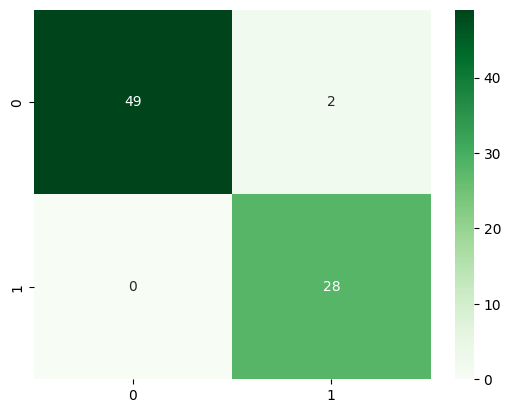

In [95]:
cm = confusion_matrix(y_test, y_pred_class, labels=[0,1])
sns.heatmap(cm, cmap='Greens', annot=True)


Evaluation Matrices

In [96]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        51
           1       0.93      1.00      0.97        28

    accuracy                           0.97        79
   macro avg       0.97      0.98      0.97        79
weighted avg       0.98      0.97      0.97        79



Lime implementation

In [97]:
output_class_names = ['False', 'True']
interpretor = lime_tabular.LimeTabularExplainer(
    x_train,
    class_names=output_class_names,
    feature_names= best_features_dataClass,
    mode='classification'
)

In [98]:
prediction_case = 4

In [99]:
exp = interpretor.explain_instance(
    x_test[prediction_case],
    model.predict,
    num_features=len(best_features_dataClass),
    top_labels=2
)
exp.show_in_notebook(show_table=True)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


e:\Python Dev Works\py_dev_v3.12\venv_py3.12\Lib\site-packages\lime\lime_tabular.py:372: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  warnings.warn("""


In [100]:
y_test[prediction_case]

1

ADDING ATTENTION LAYER TO THE MODEL

In [101]:
def attention_block(inputs):
    input_shape = k.int_shape(inputs)
    attention_probs = layers.Dense(input_shape[-1], activation='softmax')(inputs)
    attention_mul = layers.multiply([inputs, attention_probs])
    return attention_mul

In [102]:
fold_no = 1
train_acc_per_fold = []
val_acc_per_fold = []
test_acc_per_fold = []

In [103]:
for train, val in cv.split(x_train, y_train):

    print('     ')
    print(f'Training for fold {fold_no}: ')

    input_layer = Input(shape=(len(best_features_dataClass), 1))
    conv1 = Conv1D(128, kernel_size=1, activation='relu')(input_layer)
    # dropout1 = Dropout(0.2)(conv1)
    # conv2 = Conv1D(64, kernel_size=1, activation='tanh')(dropout1)
    conv2 = Conv1D(64, kernel_size=1, activation='tanh')(conv1)
    # dropout2 = Dropout(0.3)(conv2)
    # attention_output = attention_block(dropout2)
    attention_output = attention_block(conv2)
    flatten = Flatten()(attention_output)
    dense1 = Dense(64, activation='relu')(flatten)
    dropout3 = Dropout(0.4)(dense1)
    output = Dense(1, activation='sigmoid')(dropout3)
    # output = Dense(1, activation='sigmoid')(dense1)
    model = Model(inputs=input_layer, outputs=output)

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(x_train[train], y_train[train], epochs=32, batch_size=2, validation_data=(x_train[val], y_train[val]))

    scores_train = model.evaluate(x_train[train], y_train[train])
    train_acc_per_fold.append(scores_train[1] * 100)

    scores_val = model.evaluate(x_train[val], y_train[val])
    val_acc_per_fold.append(scores_val[1] * 100)

    scores_test = model.evaluate(x_test, y_test)
    test_acc_per_fold.append(scores_test[1] * 100)

    fold_no = fold_no + 1



     
Training for fold 1: 
Epoch 1/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7071 - loss: 0.6005 - val_accuracy: 0.8750 - val_loss: 0.3038
Epoch 2/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9508 - loss: 0.2143 - val_accuracy: 0.9688 - val_loss: 0.1837
Epoch 3/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9641 - loss: 0.1405 - val_accuracy: 0.9688 - val_loss: 0.1147
Epoch 4/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9931 - loss: 0.0688 - val_accuracy: 0.9375 - val_loss: 0.1070
Epoch 5/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0494 - val_accuracy: 0.9688 - val_loss: 0.1193
Epoch 6/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9745 - loss: 0.0628 - val_accuracy: 0.9062 - val_loss: 0.1216
Epoch 7/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9776 - loss: 0.0538 - val_accuracy: 0.9688 - val_loss: 0.0955
Epoch 8/32
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9753 - los

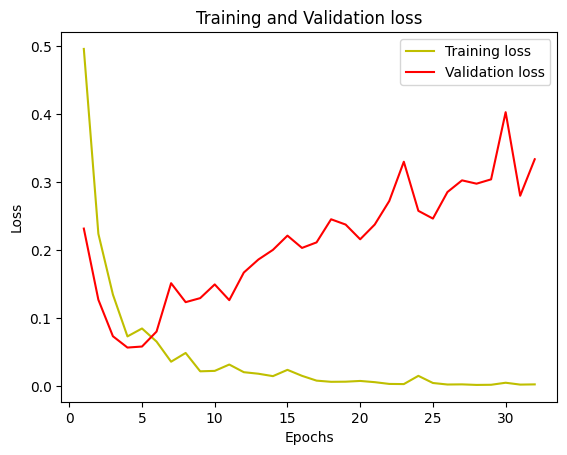

In [104]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

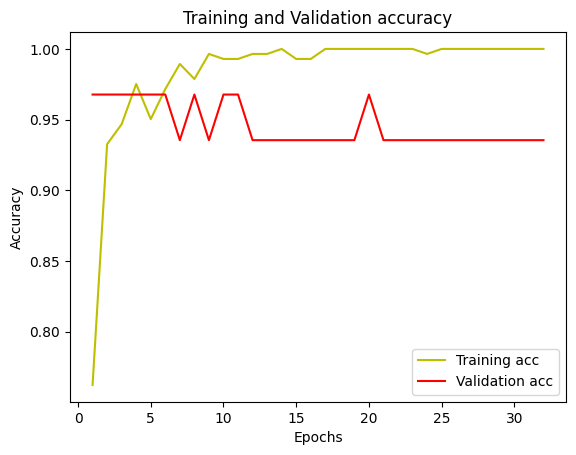

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [106]:
serial = 1
for acc in train_acc_per_fold:
    print(f"{serial}. Training Accuracy with attention layer: ", acc)
    serial = serial + 1

1. Training Accuracy with attention layer:  100.0
2. Training Accuracy with attention layer:  100.0
3. Training Accuracy with attention layer:  100.0
4. Training Accuracy with attention layer:  100.0
5. Training Accuracy with attention layer:  99.64538812637329
6. Training Accuracy with attention layer:  100.0
7. Training Accuracy with attention layer:  100.0
8. Training Accuracy with attention layer:  100.0
9. Training Accuracy with attention layer:  100.0
10. Training Accuracy with attention layer:  100.0


In [107]:
serial = 1
for acc in val_acc_per_fold:
    print(f"{serial}. Validation Accuracy with attention layer: ", acc)
    serial = serial + 1

1. Validation Accuracy with attention layer:  96.875
2. Validation Accuracy with attention layer:  100.0
3. Validation Accuracy with attention layer:  100.0
4. Validation Accuracy with attention layer:  96.77419066429138
5. Validation Accuracy with attention layer:  100.0
6. Validation Accuracy with attention layer:  96.77419066429138
7. Validation Accuracy with attention layer:  100.0
8. Validation Accuracy with attention layer:  93.54838728904724
9. Validation Accuracy with attention layer:  100.0
10. Validation Accuracy with attention layer:  93.54838728904724


In [108]:
serial = 1
for acc in test_acc_per_fold:
    print(f"{serial}. Test Accuracy with attention layer: ", acc)
    serial = serial + 1

1. Test Accuracy with attention layer:  100.0
2. Test Accuracy with attention layer:  98.73417615890503
3. Test Accuracy with attention layer:  100.0
4. Test Accuracy with attention layer:  100.0
5. Test Accuracy with attention layer:  100.0
6. Test Accuracy with attention layer:  98.73417615890503
7. Test Accuracy with attention layer:  100.0
8. Test Accuracy with attention layer:  100.0
9. Test Accuracy with attention layer:  97.46835231781006
10. Test Accuracy with attention layer:  98.73417615890503


In [109]:
print("Training accuracy with attention layer: ", np.mean(train_acc_per_fold))

Training accuracy with attention layer:  99.96453881263733


In [110]:
print("Validation accuracy with attention layer: ", np.mean(val_acc_per_fold))

Validation accuracy with attention layer:  97.75201559066772


In [111]:
print("Testing accuracy with attention layer: ", np.mean(test_acc_per_fold))

Testing accuracy with attention layer:  99.36708807945251


drawing the confusion matrix

In [112]:
y_pred = model.predict(x_test)
y_pred_class = (y_pred > 0.5).astype("int32")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


<Axes: >

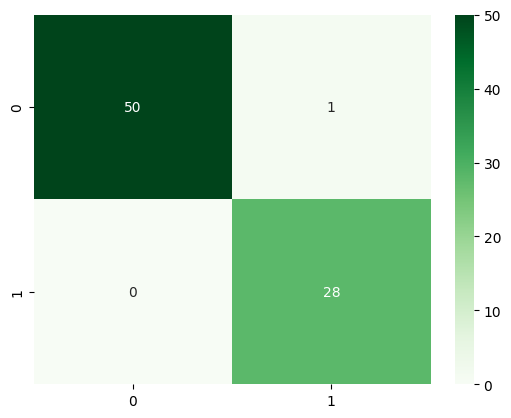

In [113]:
cm = confusion_matrix(y_test, y_pred_class, labels=[0,1])
sns.heatmap(cm, cmap='Greens', annot=True)


Evaluation Matrices

In [114]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.97      1.00      0.98        28

    accuracy                           0.99        79
   macro avg       0.98      0.99      0.99        79
weighted avg       0.99      0.99      0.99        79



Lime Implementation For Attention Layer Model

In [115]:
output_class_names = ['False', 'True']
interpretor = lime_tabular.LimeTabularExplainer(
    x_train,
    class_names=output_class_names,
    feature_names= best_features_dataClass,
    mode='classification'
)

In [116]:
prediction_case = 4

In [117]:
exp = interpretor.explain_instance(
    x_test[prediction_case],
    model.predict,
    num_features=len(best_features_dataClass),
    top_labels=2
)
exp.show_in_notebook(show_table=True)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


e:\Python Dev Works\py_dev_v3.12\venv_py3.12\Lib\site-packages\lime\lime_tabular.py:372: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  warnings.warn("""


In [118]:
y_test[prediction_case]

1

In [119]:
from keras.utils import plot_model

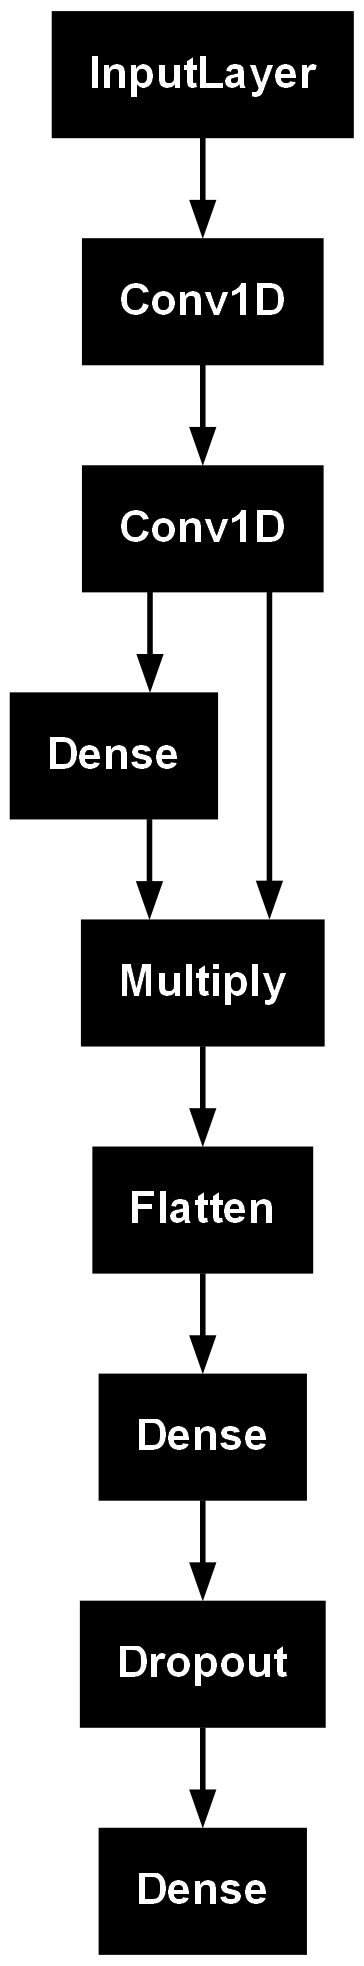

In [120]:
plot_model(model,to_file='my_model.png')